In [3]:
import math
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
rcParams['figure.figsize'] =  16,12

/home/mmarchetti/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


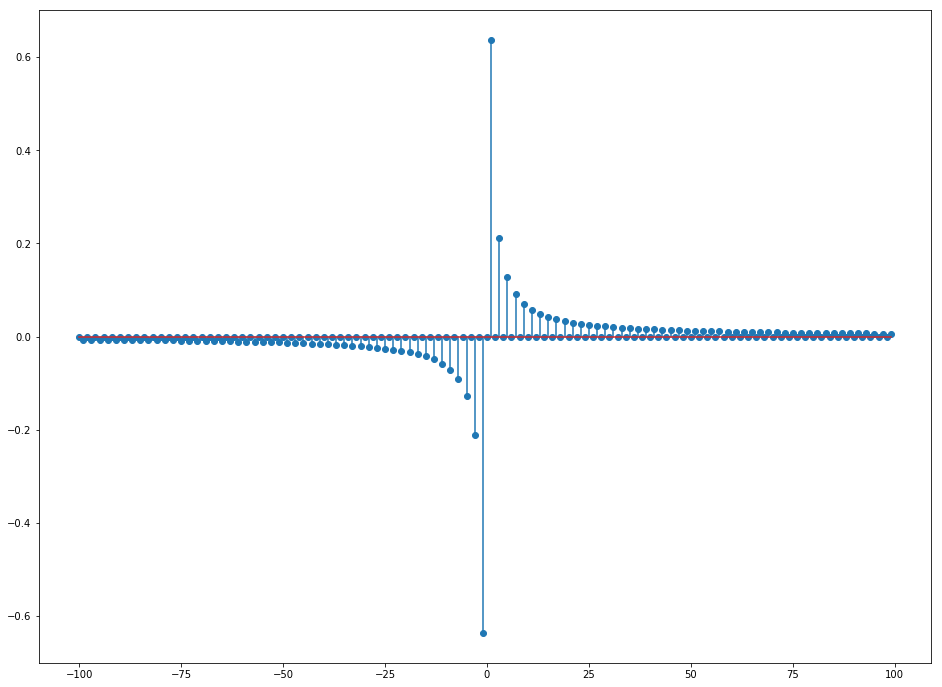

In [11]:
L_hf = 100
n_delay_Hilbert_filter = L_hf; #Retardo del filtro de Hilbert

n = np.arange(-L_hf,L_hf,1)

def gen_hilbert_filter():
    fn = (2*np.sin(np.pi*n/2)**2)/(np.pi*n)
    fn[L_hf] = 0
    return fn

fn = gen_hilbert_filter()

pl.figure(1)
pl.stem(n,fn)
pl.show()

In [14]:
def gen_freq_swep(fn):
    Omega =  np.arange(-1,1,1./2**8)*np.pi
    N = 1000
    H_mag=[]
    H_fase=[]
    for omega in Omega:
        xn = [np.exp(np.complex(0,omega*n)) for n in range(N)]
        yn = np.convolve(xn,fn)
        H_mag.append(np.abs(yn[N/2]))
        H_fase.append(np.angle(yn[N/2]*np.conj(xn[N/2-n_delay_Hilbert_filter])))
    return Omega,H_mag,H_fase

Omega,H_mag,H_fase=gen_freq_swep(fn)

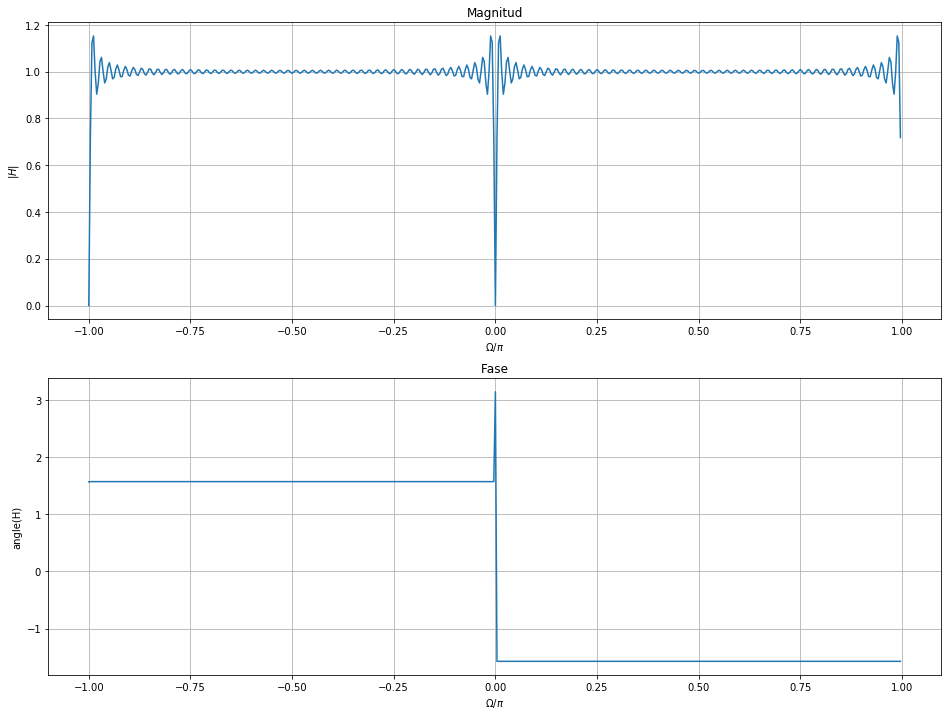

In [15]:
def plot_freq_response():
    pl.subplot(2,1,1)
    pl.plot(Omega/np.pi,H_mag);
    pl.title('Magnitud');
    pl.ylabel('$\|H\|$')
    pl.xlabel('$\Omega/\pi$');
    pl.grid()
    pl.subplot(2,1,2) 
    pl.plot(Omega/np.pi,H_fase);
    pl.title('Fase');
    pl.ylabel('angle(H)')
    pl.xlabel('$\Omega/\pi$');
    pl.grid(True)
    
pl.figure(1)
plot_freq_response()
pl.show()

In [132]:
fB = 32e9                                 #Baudrate
T = 1/fB                                  #Tiempo entre simbolos
M = 8                                     #Factor de sobre muestreo
fs = M*fB                                 #Sample rate

L = 20                                    #cantidad de tabs?
t = np.arange(-L,L,1./M)*T

n_delay_cos_filter = L*M

def gen_cos_filter(beta):
    return np.sinc(t/T)*np.cos(np.pi*beta*t/T)/(1-4*(beta**2)*(t/T)**2)

gn = gen_cos_filter(0.4001)

In [133]:
def gen_input():
    ak_r = 2*np.random.randint(2,size=n_symbols)-1
    ak_i = 2*np.random.randint(2,size=n_symbols)-1
    #ak = np.complex(ak_r,ak_i)
    xn = np.zeros(n_symbols*M,dtype=complex)
    xn[::M]=ak_r+1j*ak_i
    return xn

n_symbols = 1000
xn = gen_input()

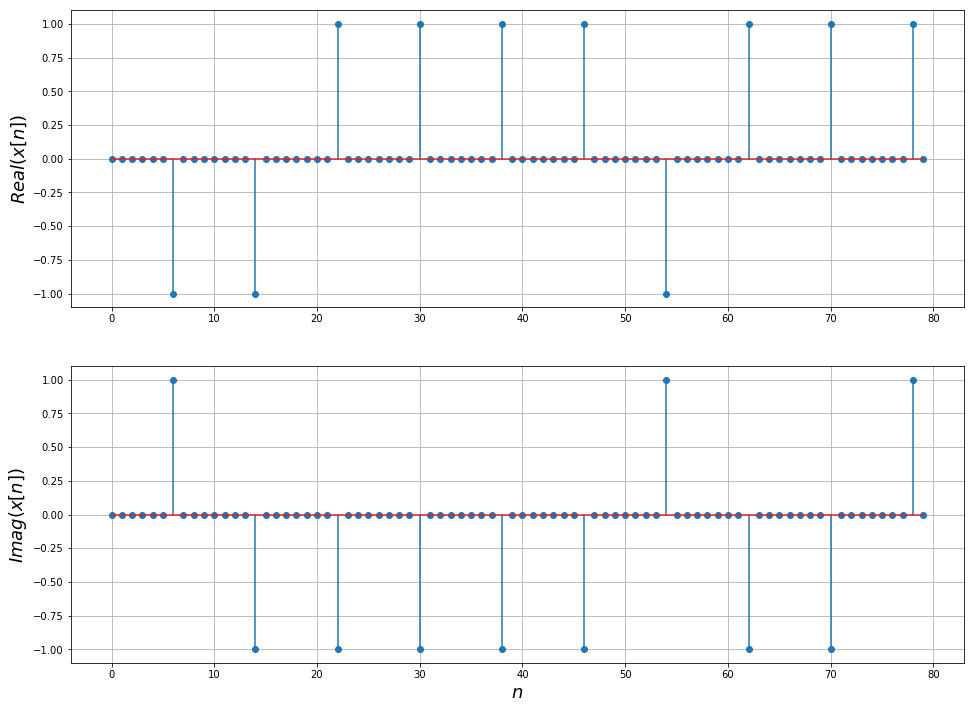

In [134]:
pl.subplot(2,1,1)
pl.grid(True)
pl.stem(np.real(xn[10:10+M*10]))
pl.ylabel('$Real(x[n])$',fontsize=18)
pl.subplot(2,1,2)
pl.grid(True)
pl.stem(np.imag(xn[10:10+M*10]))
pl.ylabel('$Imag(x[n])$',fontsize=18)

pl.xlabel('$n$',fontsize=18);
pl.show()

In [135]:
yn = np.convolve(xn,gn)

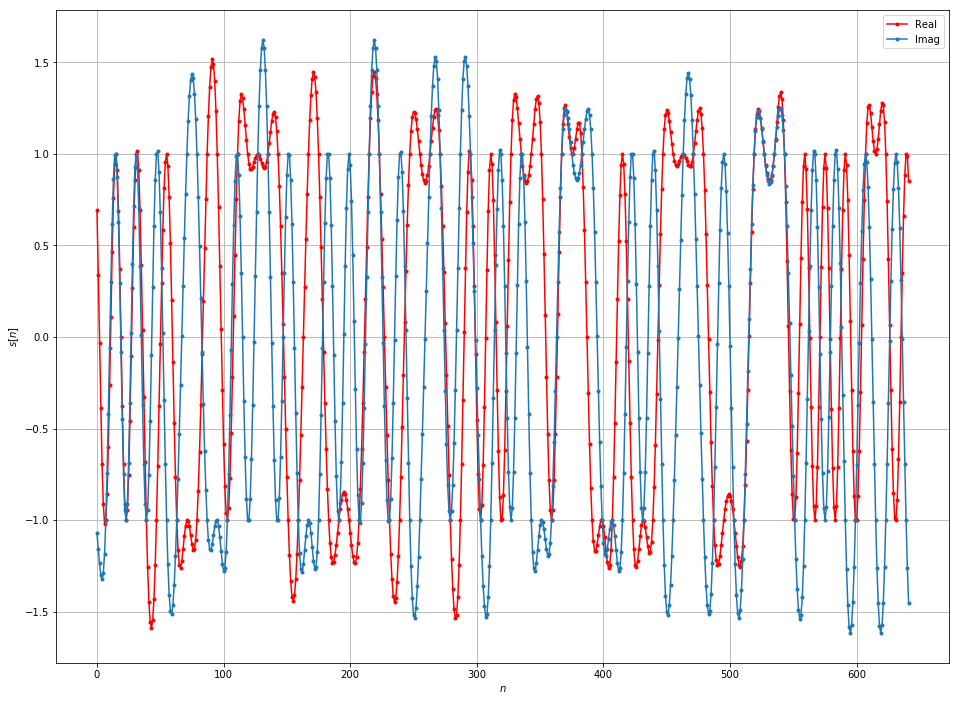

In [136]:
def plot_time(sn):
    pl.figure()
    pl.plot(np.real(sn[(2*L*M+1):(2*L*M+1)*3]),'r.-',label='Real');
    pl.plot(np.imag(sn[(2*L*M+1):(2*L*M+1)*3]),'.-',label='Imag');
    pl.ylabel('$s[n]$')
    pl.xlabel('$n$');
    pl.grid(True)
    pl.legend()

plot_time(yn)
pl.show()

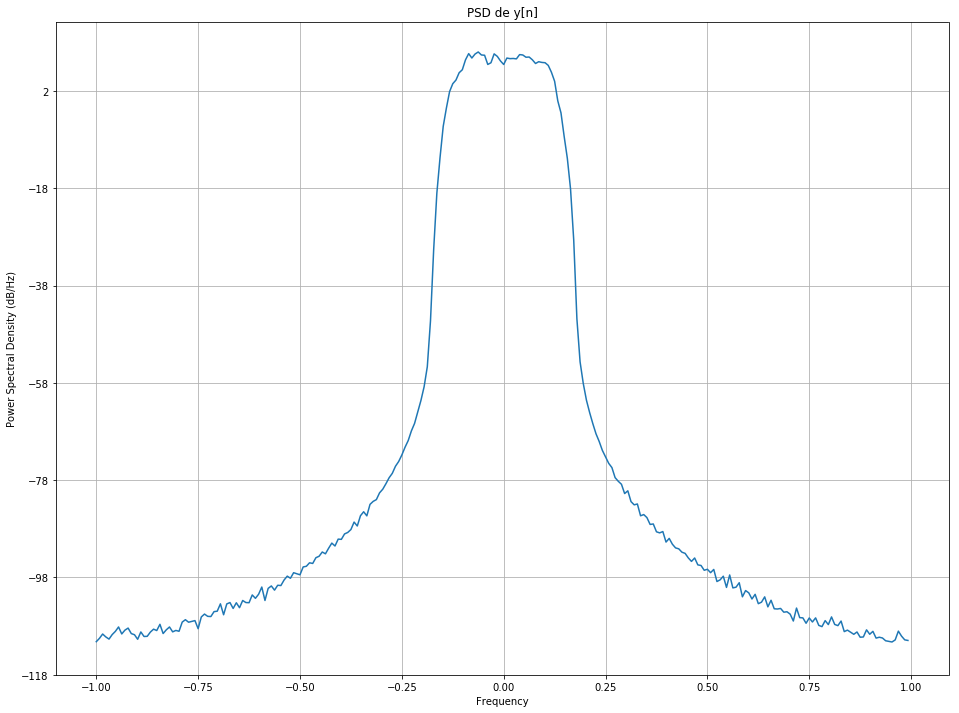

In [137]:
(Pxx,freqs)=pl.psd(yn)
pl.title('PSD de y[n]')
pl.show()

In [138]:
omega_c = 3*np.pi/M
sn = yn*[np.exp(np.complex(0,omega_c*n)) for n in range(len(yn))]

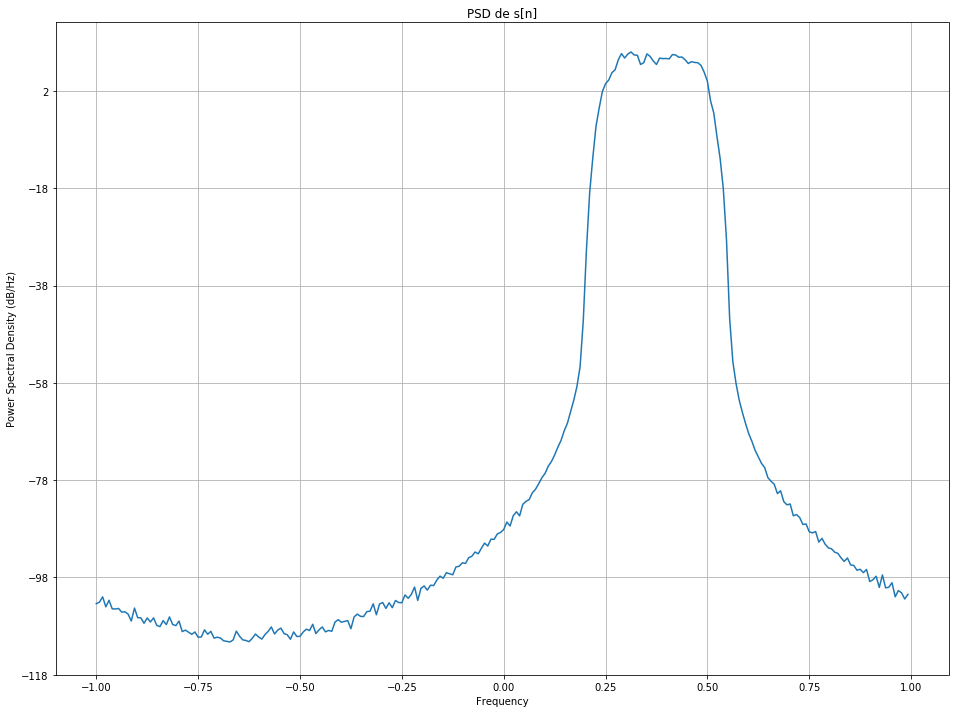

In [139]:
(Pxx,freqs)=pl.psd(sn)
pl.title('PSD de s[n]')
pl.show()

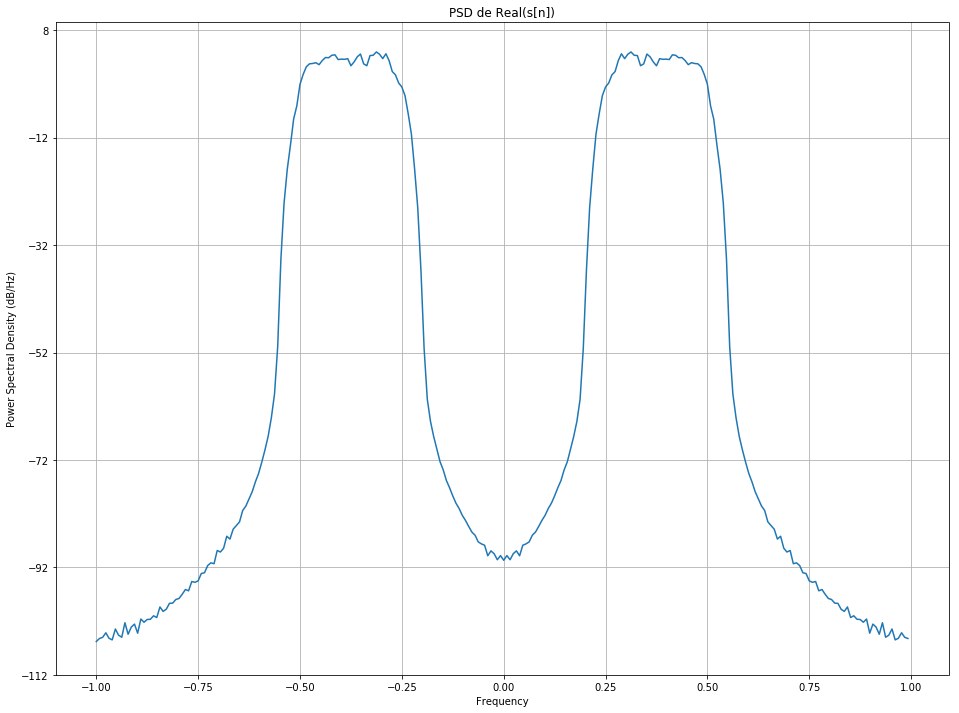

In [140]:
sn_r = np.real(sn)

(Pxx,freqs)=pl.psd(sn_r,sides='twosided')
pl.title('PSD de Real(s[n])')
pl.show()

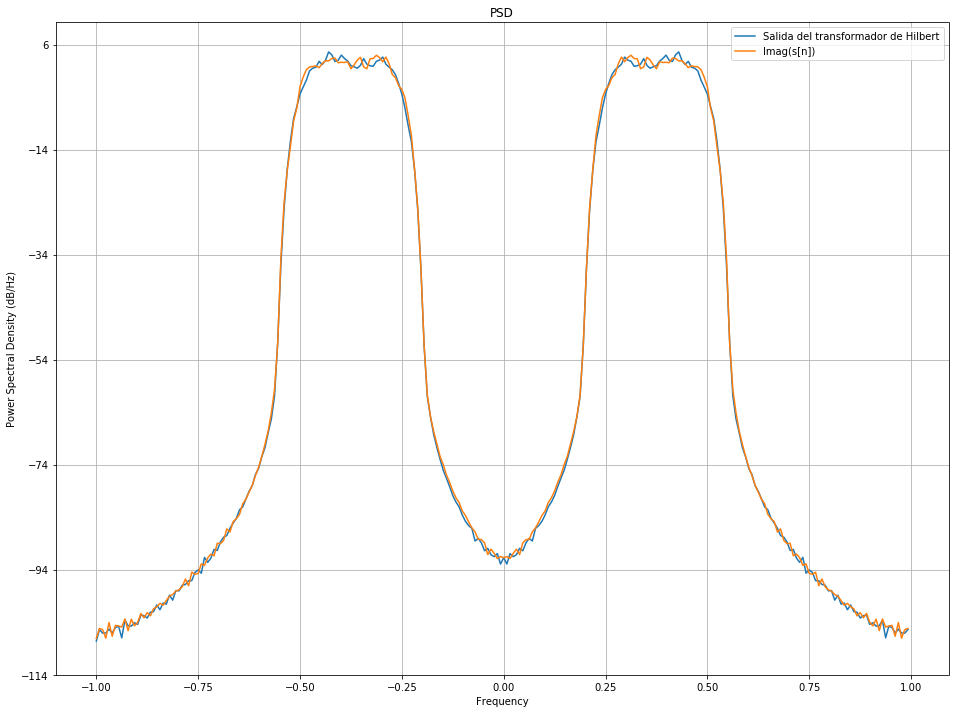

In [141]:
sn_h = np.convolve(sn_r,fn,mode='full')
sn_i = np.imag(sn)

(Pxx0,freqs0)=pl.psd(sn_h,sides='twosided',label='Salida del transformador de Hilbert')
(Pxx1,freqs1)=pl.psd(sn_i,sides='twosided',label='Imag(s[n])')
pl.title('PSD')
pl.legend()
pl.show()

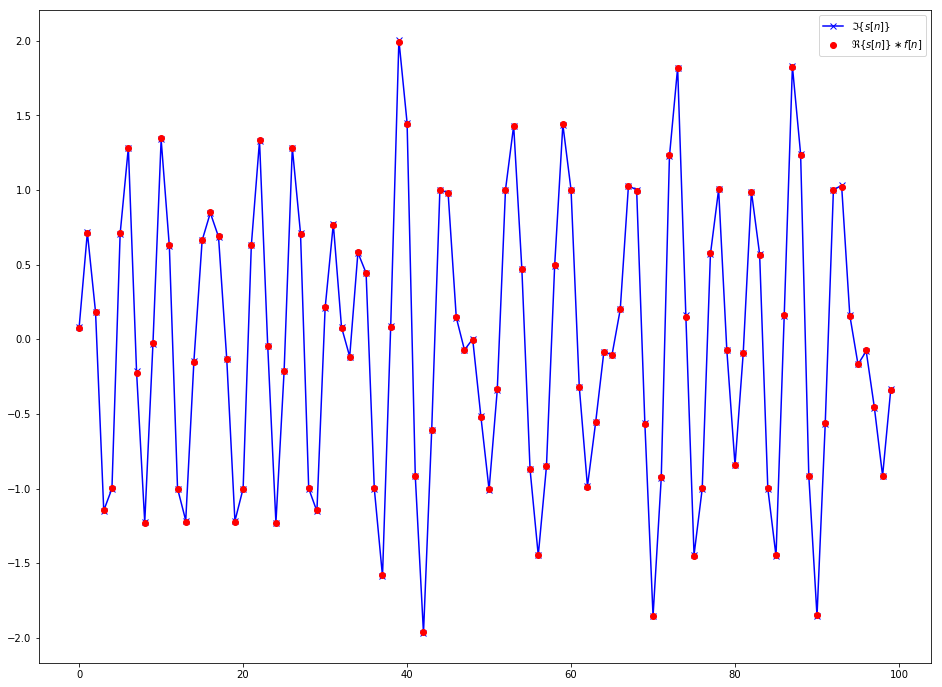

In [142]:
pl.plot(sn_i[500:600],'bx-',label=r'$\Im\{s[n]\}$')
pl.plot(sn_h[L_hf+500:L_hf+600],'or',label=r'$\Re\{s[n]\}\ast f[n]$')
pl.legend()
pl.show()

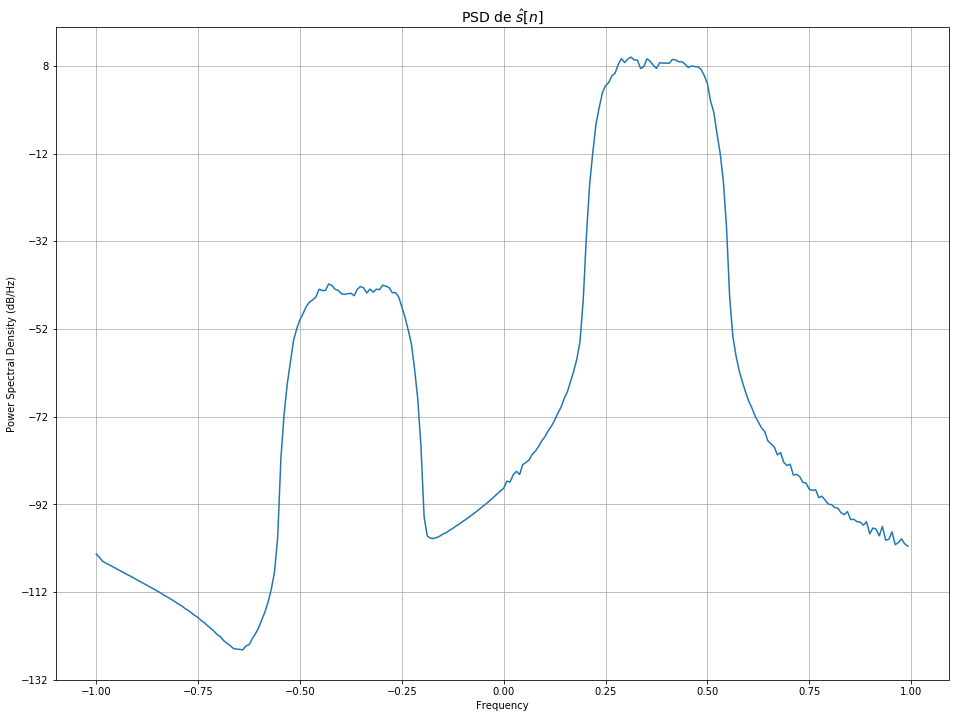

In [143]:
sn_hat = sn_r+1j*sn_h[L_hf:-(L_hf-1)]

(a,b)=pl.psd(sn_hat, window=None, sides='twosided')
pl.title('PSD de '+ r'$\hat{s}[n]$',fontsize=14)
pl.show()

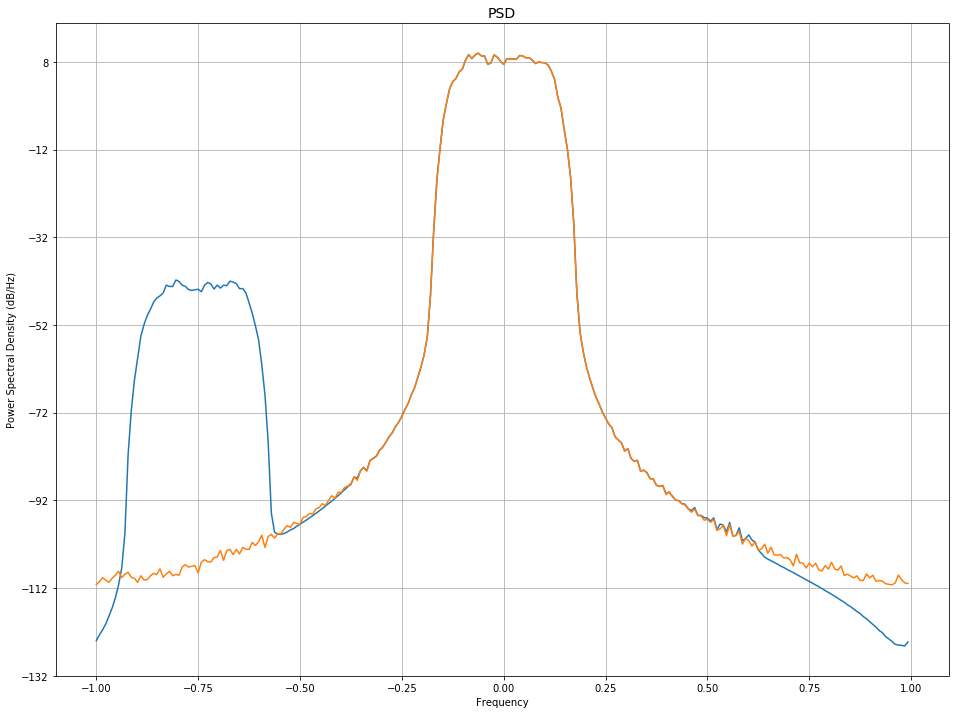

In [144]:
yn_hat = sn_hat*[np.exp(np.complex(0,-omega_c*n)) for n in range(len(sn_hat))]

(a,b)=pl.psd(yn_hat, sides='twosided',label=r'$\hat{y}[n]$')
(a,b)=pl.psd(yn, sides='twosided',label=r'$y[n]$')
pl.title('PSD',fontsize=14)
pl.show()

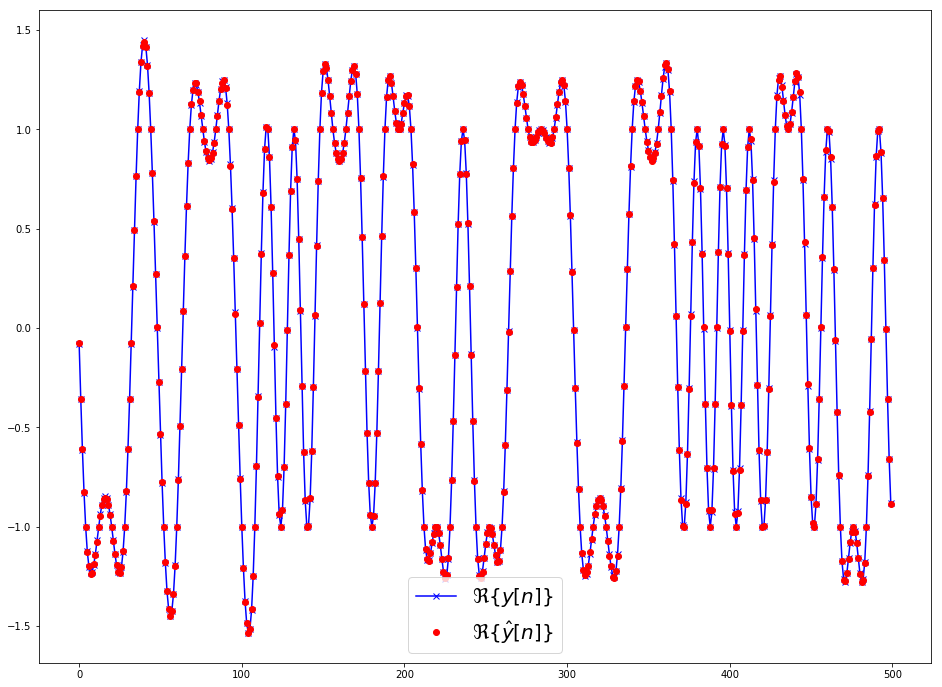

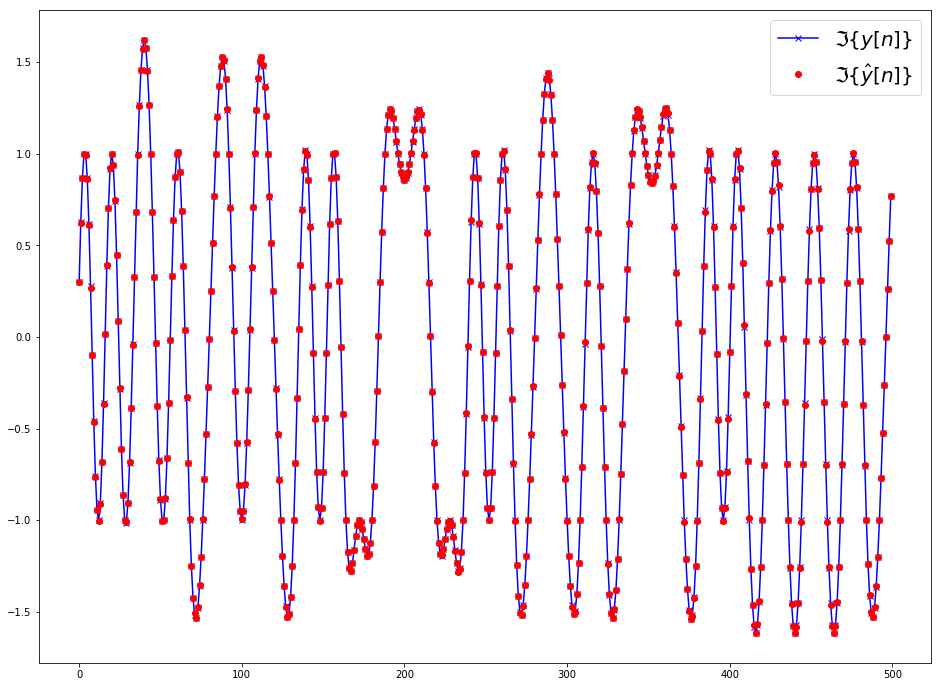

In [145]:
pl.plot(np.real(yn[500:1000]),'bx-',label=r'$\Re\{y[n]\}$')
pl.plot(np.real(yn_hat[500:1000]),'ro',label=r'$\Re\{\hat{y}[n]\}$')
pl.legend(fontsize=20)
pl.figure()

pl.plot(np.imag(yn[500:1000]),'bx-',label=r'$\Im\{y[n]\}$')
pl.plot(np.imag(yn_hat[500:1000]),'ro',label=r'$\Im\{\hat{y}[n]\}$')
pl.legend(fontsize=20)
pl.show()

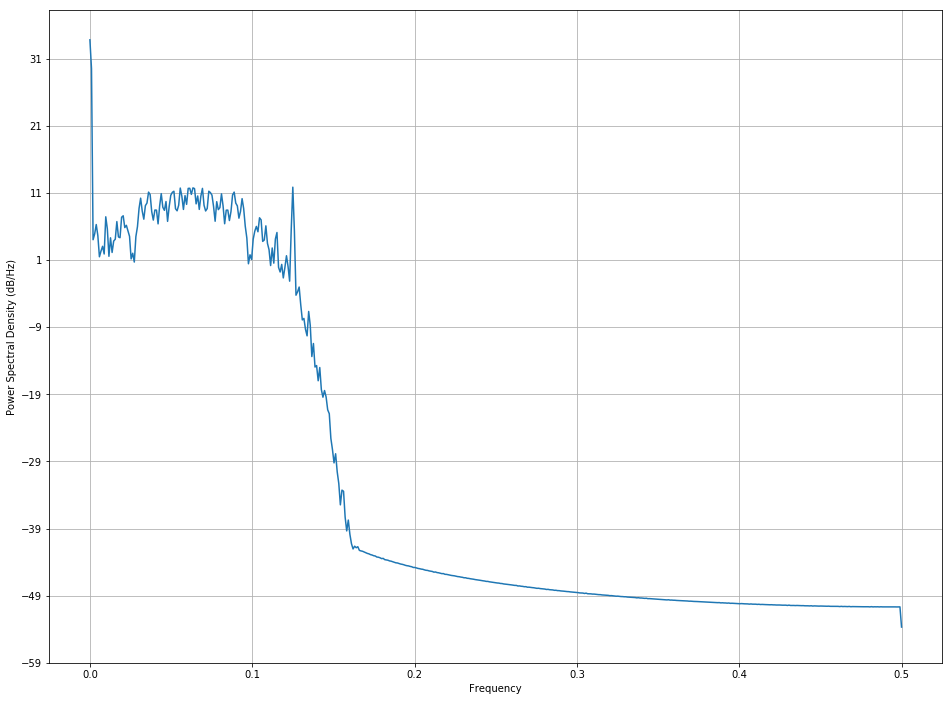

In [146]:
from scipy import signal
z=np.abs(yn)**2
#pl.psd(z,scale_by_freq=True)
pl.psd(z, NFFT=2**10, Fs=1, window=signal.get_window('hamming',2**10))
pl.show()


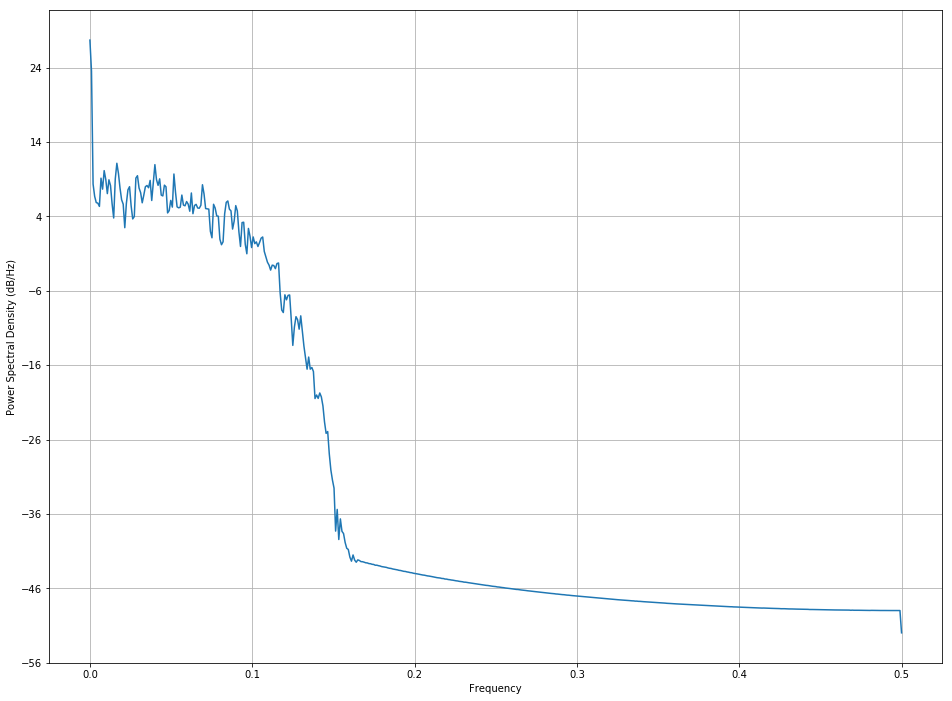

In [158]:
delay=M/2
xn=gen_input()
xxn = np.convolve(xn,gn)[delay:]
yyn = (xxn+yn[:-delay])/2

zz=np.abs(yyn)**2
pl.psd(zz, NFFT=2**10, Fs=1, window=signal.get_window('hamming',2**10))
pl.show()

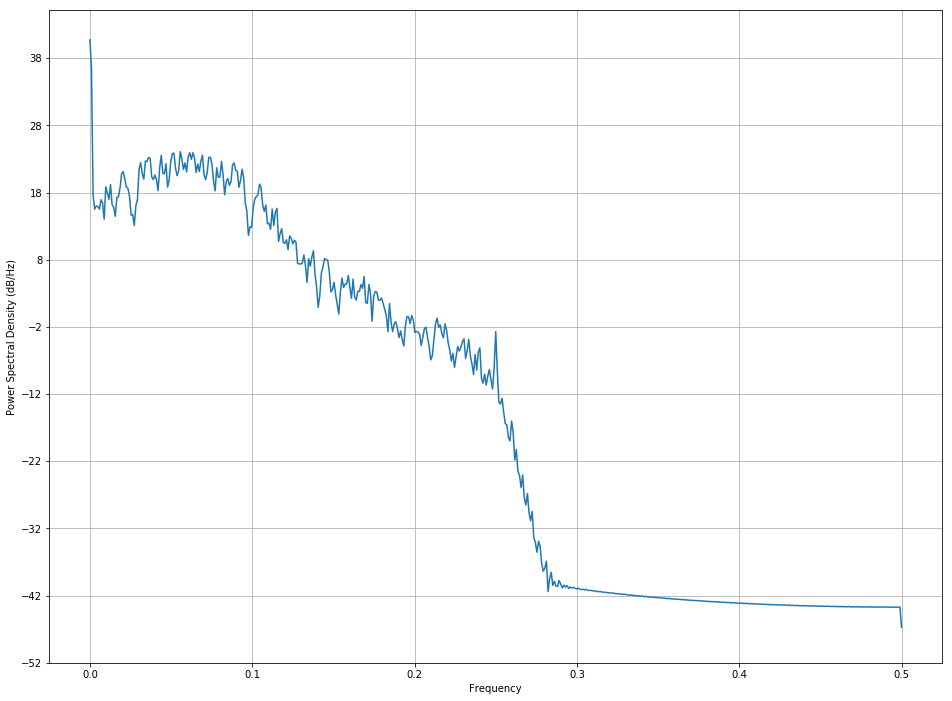

In [159]:
z=np.abs(yn)**4
#pl.psd(z,scale_by_freq=True)
pl.psd(z, NFFT=2**10, Fs=1, window=signal.get_window('hamming',2**10))
pl.show()
